# Нейронная сеть без библиотек
По книге Тарика Рашида

In [3]:
import numpy as np

# for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

# helper to load data from PNG image files
import imageio

import warnings
warnings.filterwarnings("ignore")

Зачем в этой задаче классы поясняет вот эта картинка:

![caption](imgs/class_explanation.png)

Таким образом, *класс* - это описание объекта.


In [13]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество узлов во входном, скрытом и выходном слоях
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей wih и who.
        # Весовые коэффициенты связей между узлом i и узлом j
        # следующего слоя обозначены как w_i_j: w11, w21, w12 итд.
        
        # Весовые коэффициенты = (Центр распределения, стандартное отклонение, размер массива)
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # Коэффициент обучения
        self.lr = learningrate
        
        # Использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # Тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # targets_list = тренировочные примеры
        
        # Преобразовать список входных значений в двумерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # Рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # Рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Рассчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # Рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        # Ошибки выходного слоя = (целевое зн-е - фактическое зн-е)
        output_errors = targets - final_outputs
        
        # Ошибки скрытого слоя - это распределенные пропорционально весовым коэфф-там связей
        # и рекомбинированным на скрытых узлах
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # Обновить весовые коэфф-ты для свзей между скрытым и выходным слоями
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # Обновить весовые коэфф-ты для свзей между входным и скрытым слоями
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # Опрос нейронной сети
    def query(self, inputs_list):
        # Преобразовать список входных значений в двумерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        
        # Рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # Рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Рассчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # Рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [14]:
# Количество входных, скрытых и выходных узлов
input_nodes = 28 * 28   # 784
hidden_nodes = 200
output_nodes = 10

# Коэффициент обучения равен 0,1
learning_rate = 0.1

# Создать эксемпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [15]:
# Загрузить тестовый набор данных MNIST
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#### Тренировка нейронной сети

In [29]:
training_data_list[0:10]

# Первое значение - это маркер (фактическая цифра)
# Последующие значения (их тут очень много) - это величины пикселей рукописных цифр (784 пикселя)

['5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [26]:
# Переменная epochs указывает, сколько раз проводится тренирвока нейронной сети
epochs = 10

for e in range(epochs):
    # Перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений
        all_values = record.split(',')
        
        # Масштабировать и сместить входные значения
        # all_values[1:] -> Берем все значения, кроме маркера
        # Смещение делаем, чтобы не возникло искусственного блокирования обновления весов из-за 0.0 (стр. 185)
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # Создать целевые входные значения (все равны 0.01 за исключением желаемого маркерного, равного 0,99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

Попробуем применить нейронную сеть к какой-нибудь нашей картинке:

min =  0.19581719
max =  0.58418447
[[0.05922945]
 [0.01140924]
 [0.02293119]
 [0.02039734]
 [0.12576167]
 [0.05655413]
 [0.03320732]
 [0.02165404]
 [0.01958488]
 [0.0040345 ]]
Ответ нейросети:  4


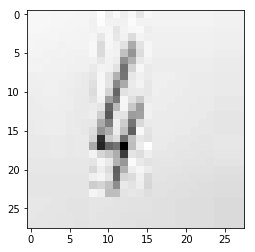

In [21]:
# load image data from png files into an array
img_array = imageio.imread('/Users/user/Desktop/nn/imgs/1.png', as_gray=True)
    
# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)
    
# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", np.min(img_data))
print("max = ", np.max(img_data))
plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# Опрос сети
outputs = n.query(img_data)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("Ответ нейросети: ", label)